In [9]:
import pandas as pd
import gymnasium as gym
import os
from ale_py import ALEInterface, roms
import time
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
from keras.optimizers import Adam
import random
from collections import deque
from keras import Input
import pygetwindow as gw
import pyautogui
from PIL import Image
import time
from PIL import Image
import imagehash
from collections import defaultdict

In [4]:
window = gw.getWindowsWithTitle("Picture Poker")[0]
left, top, width, height = window.left, window.top, window.width, window.height
screenshot = pyautogui.screenshot(region=(left, top, width, height))
img = cv2.cvtColor(np.array(screenshot), cv2.COLOR_RGB2BGR)

In [5]:
def gary(image):
    gar=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    crap=gar[1500:-20, 500:-500]
    resized = cv2.resize(crap, (84, 84), interpolation=cv2.INTER_AREA)
    return resized 

In [6]:
pros=gary(img)

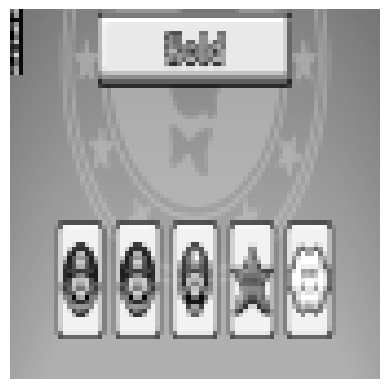

In [7]:
plt.imshow(pros,cmap='gray')
plt.axis("off")
plt.show()

In [52]:
#actions 
#pyautogui.click(x=2877, y=1557)
#pyautogui.press('1')
#pyautogui.press('2')
#pyautogui.press('3')
#pyautogui.press('4')
#pyautogui.press('5')

In [56]:
for i in range(50):
    x, y = pyautogui.position()
    print(f"({x}, {y})", end='\r')
    time.sleep(0.1)

In [16]:
def split(image):
    cardw = image.shape[1] // 5
    cards = [image[:, i*cardw:(i+1)*cardw] for i in range(5)]
    return cards

In [17]:
def hash(card_image):
    pil_img = Image.fromarray(card_image)
    return imagehash.average_hash(pil_img)

In [18]:
def match(card_images):
    hashes = [hash(card) for card in card_images]
    groups = defaultdict(list)
    for idx, h in enumerate(hashes):
        matched = False
        for key in groups:
            if abs(h - key) <= 2:
                groups[key].append(idx)
                matched = True
                break
        if not matched:
            groups[h].append(idx)
    
    return groups

In [19]:
def unmatched(groups):
    for group in groups.values():
        if len(group) == 1:
            return group[0]
    return None

In [22]:
pros = gary(img)  # Your preprocessed screenshot
card_img = split(pros)
groups = match(card_imgs)
unmatched_idx = unmatched(groups)

print(f"Unmatched card index: {unmatched_idx}")

NameError: name 'card_imgs' is not defined